In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics
#Preparing data
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
#convert the predictors and the target variable to dataframes
iris_predictors = pd.DataFrame(iris.data)
iris_target = pd.DataFrame(iris.target)

In [3]:
from sklearn.model_selection import train_test_split
pred_train, pred_test, tar_train, tar_test  =  train_test_split(iris_predictors, iris_target, test_size=.2)

In [22]:
#build the random forest model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
rf=classifier.fit(pred_train,tar_train.ravel())
rf.predictions=classifier.predict(pred_test)

In [ ]:
#help(RandomForestClassifier)

In [23]:
print(rf.feature_importances_)

[0.11709208 0.02570803 0.37167703 0.48552287]


In [24]:
#display the confusion matrix
sklearn.metrics.confusion_matrix(tar_test,rf.predictions)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 10]], dtype=int64)

In [25]:
#calculate the accuracy
sklearn.metrics.accuracy_score(tar_test, rf.predictions)

1.0

In [26]:
#Checking how many trees will return the best result
trees=range(100)
accuracy=np.zeros(100)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

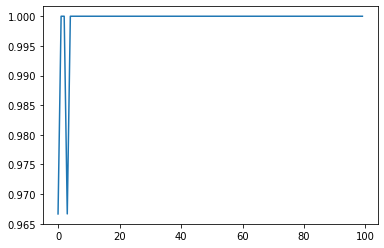

In [27]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)

In [28]:
#Build Naive Bayes model on training data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
gnb = classifier.fit(pred_train,tar_train)
gnb.predictions=gnb.predict(pred_test)

In [29]:
sklearn.metrics.confusion_matrix(tar_test,gnb.predictions)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 10]], dtype=int64)

In [30]:
sklearn.metrics.accuracy_score(tar_test, gnb.predictions)

1.0

In [31]:
#Build KNN model
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn = classifier.fit(pred_train,tar_train)
knn.predictions = knn.predict(pred_test)

In [32]:
sklearn.metrics.confusion_matrix(tar_test,knn.predictions)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 10]], dtype=int64)

In [33]:
sklearn.metrics.accuracy_score(tar_test, knn.predictions)

1.0

In [34]:
type(tar_train)

numpy.ndarray

In [35]:
tar_train = np.ravel(tar_train)
type(tar_train)

numpy.ndarray

In [36]:
#Checking how many trees will return the best result
trees=range(1000)
accuracy=np.zeros(1000)

for idx in range(1000):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

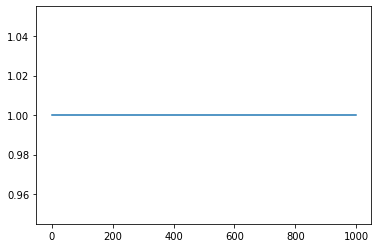

In [37]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)